In [1]:
import sys
sys.path.insert(0, './../')
import bbdc2021 as bbdc

In [2]:
pipe_param = {'data_folder': './../data/',
                  'wav_files_folder': 'final_pre_dataset', # fft parameter
                  'window_length': 1024, 'window_overlap': 523,
                  'band_size': 4, 'sample_rate': 16000,
                  'dev_csv': 'dev-labels.csv', # filelisten, falls man doch auf kleinerem probieren möchte
                  'eval_csv': 'challenge_filelist_dummy.csv',
                  'scaling': 'no', # 'standard', 'minmax' oder 'no' wenn kein scaling sein soll
                  'test_split_fraction': 0.1,
                  'prediction_path': './', # wo prediction csvs gespeichert werden sollen
                  'post_processing': 'fill', # 'fill' is das von Jannes
                  'submission_file_path': './challenge_submission.csv'}
unet_param = {'channels': [32, 64, 90],
              'lessParameter': True,
              'val_split_fraction': 1/9, # 1/9 damit man 1000 von den 9000 abzweigt
              'loss': 'categorical_crossentropy', # bbdc.dice_loss möglich
              'learning_rate': 0.001,
              'batch_size': 15,
              'epochs': 100,
              'load_path': 'model9561.h5'} # None, wenn trainiert werden soll

In [3]:
#def pipeline_u_net_1(pipe_param, model_param):
#    """Current u_net pipeline from loading data to prediction.
#    Takes paramater dictionary as argument"""

# load
x_dev, y_dev, timep, filelist_dev, x_ch, filelist_ch = bbdc.loading_block1(pipe_param)
# split (tv=train and val set)
x_tv, x_test, y_tv, y_test, filelist_test = bbdc.split_block1(x_dev, y_dev, timep, filelist_dev, pipe_param)

Csv from wav files already existend. Skipping calc_fft.
Scaled numpy files already existend. Skipping scaling and load_data function.
Splitting last 0.1 from dev set as test set.


In [4]:
# model fit (or load)
history, model = bbdc.model_block1_unet(x_tv, y_tv, unet_param)
# evaluate
bbdc.evaluation_block1(x_test, y_test, timep, filelist_test, model, pipe_param)
# post processing and its evaluation
pp_pred_test, pp_pred_ch = bbdc.postprocessing_with_evaluation_block1(x_test, y_test, timep, filelist_test,
                                                                      x_ch, filelist_ch, model, pipe_param)
# challenge prediction
bbdc.challenge_prediction_block1(pp_pred_ch, timep, filelist_ch, pipe_param)

Tensorflow version: 2.4.1
Loading existing model from path: model9561.h5
32/32 [==============================] - 2s 26ms/step - loss: 4.0955 - mae: 0.1101 - accuracy: 0.2969

Evaluation:
Loss, MAE, Accuracy [4.095458507537842, 0.11012133955955505, 0.29691874980926514]
PSDS (0.0031293375250592325, 'Valid file')

Filling post processing used.
PSDS (0.08373749890813155, 'Valid file')


/home/alex/.local/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/alex/.local/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Submission file saved at ./challenge_submission.csv


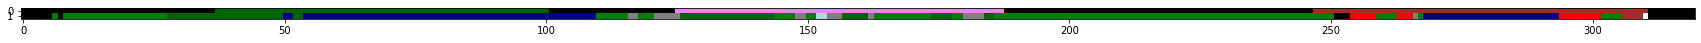

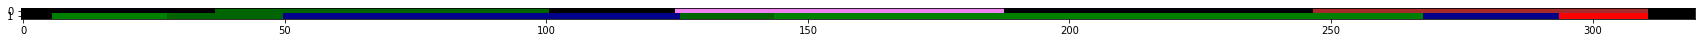

In [5]:
# Compare model prediction and post processed model prediction to ground truth
case = 0
bbdc.plotPredictionAndGT(y_test, model.predict(x_test), case)
bbdc.plotPredictionAndGT(y_test, pp_pred_test, case)